# Data Exploration - Correlation Analysis with Heat Map

## Problem Statement

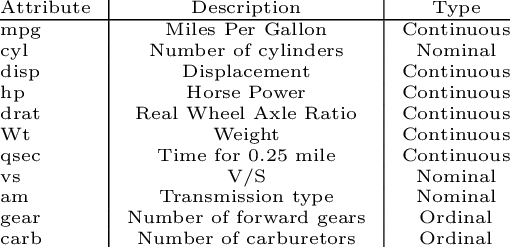
###### image source : https://www.researchgate.net/figure/mtcars-Dataset-Description_tbl2_306258000

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\rifqi\OneDrive\Work\Data Science Course\Machine Learning\Lesson 3 Practice - Data Preprocessing\mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Analisa Korelasi Menggunakan Heat Map

<AxesSubplot:>

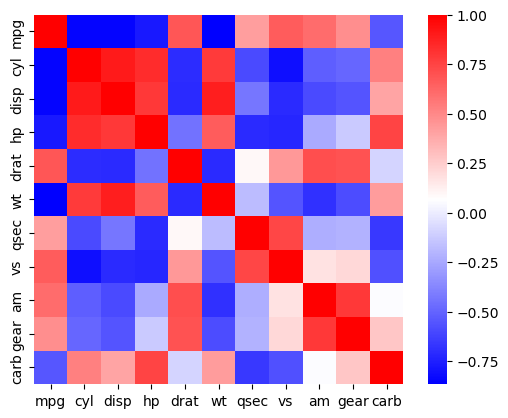

In [3]:
#heatmap bisa digunakan untuk menganalisa korelasi antar variabel dari suatu data secara keseluruhan dengan cepat
#1. buat variabel yang menyimpan koefisien korelasi dari seluruh variabel
#2. buat heatmap sns.heatmap(data = nama var. korelasi, square = True, cmap = 'bwr')
correlations = df.corr()
sns.heatmap(data = correlations, square = True, cmap = 'bwr')

###### heatmap diatas menunjukkan bahwa terdapat beberapa variabel yang berkorelasi positif kuat terhadap tenaga mesin (hp) yaitu: cyl, disp, wt, dan carb. Hasil tersebut dapat diinterpretasikan bahwa semakin tinggi tenaga mesin (hp) maka nilai cyl, disp, wt, dan carb akan meningkat

## Analisa Korelasi Detail untuk variabel berkorelasi positif kuat

### Jumlah Silinder terhadap tenaga mesin

In [4]:
#analisa korelasi jumlah silinder (cyl) dan tenaga mesin (hp)
df[['cyl', 'hp']].corr()

,cyl,hp
cyl,1.000000,0.832447
hp,0.832447,1.000000


In [5]:
#kita juga bisa melihat tenaga mesin berdasarkan kategori tertentu, misal berdasarkan silinder
#untuk melihat apakah silinder bisa digunakan sebagai kategori, kita gunakan namadf['nama kolom'].unique()
df['cyl'].unique()

array([6, 4, 8], dtype=int64)

In [6]:
#berdasarkan hasil diatas, kolom silinder hanya terdapat tiga angka saja yaitu 6, 4, dan 8.
#data tersebut bisa digunakan sebagai kategori
#pengelompokan data tenaga mesin (hp) berdasarkan jumlah silinder dapat dilakukan dengan cara berikut
df[['cyl', 'hp']].groupby(['cyl']).describe()

hp                                                            
    count        mean        std    min     25%    50%     75%    max
cyl                                                                  
4    11.0   82.636364  20.934530   52.0   65.50   91.0   96.00  113.0
6     7.0  122.285714  24.260491  105.0  110.00  110.0  123.00  175.0
8    14.0  209.214286  50.976886  150.0  176.25  192.5  241.25  335.0

###### hasil analisa deskriptif diatas menunjukkan bahwa terdapat tiga kategori silinder mesin yaitu mesin silinder 4, 6, dan 8. Semakin banyak jumlah silinder, maka rata-rata tenaga mesin meningkat

### Besar displacement terhadap tenaga mesin

In [7]:
df[['disp', 'hp']].corr()

,disp,hp
disp,1.000000,0.790949
hp,0.790949,1.000000


In [8]:
df['disp'].unique()

array([160. , 108. , 258. , 360. , 225. , 146.7, 140.8, 167.6, 275.8,
       472. , 460. , 440. ,  78.7,  75.7,  71.1, 120.1, 318. , 304. ,
       350. , 400. ,  79. , 120.3,  95.1, 351. , 145. , 301. , 121. ])

In [9]:
df[['disp', 'hp']].groupby(['disp']).describe()

hp                                                     
      count   mean        std    min    25%    50%    75%    max
disp                                                            
71.1    1.0   65.0        NaN   65.0   65.0   65.0   65.0   65.0
75.7    1.0   52.0        NaN   52.0   52.0   52.0   52.0   52.0
78.7    1.0   66.0        NaN   66.0   66.0   66.0   66.0   66.0
79.0    1.0   66.0        NaN   66.0   66.0   66.0   66.0   66.0
95.1    1.0  113.0        NaN  113.0  113.0  113.0  113.0  113.0
108.0   1.0   93.0        NaN   93.0   93.0   93.0   93.0   93.0
120.1   1.0   97.0        NaN   97.0   97.0   97.0   97.0   97.0
120.3   1.0   91.0        NaN   91.0   91.0   91.0   91.0   91.0
121.0   1.0  109.0        NaN  109.0  109.0  109.0  109.0  109.0
140.8   1.0   95.0        NaN   95.0   95.0   95.0   95.0   95.0
145.0   1.0  175.0        NaN  175.0  175.0  175.0  175.0  175.0
146.7   1.0   62.0        NaN   62.0   62.0   62.0   62.0   62.0
160.0   2.0  110.0   0.000000  110.0  110.0  110.0  110.0  110.0
167.6   2.0  123.0   0.000000  123.0  123.0  123.0  123.0  123.0
225.0   1.0  105.0        NaN  105.0  105.0  105.0  105.0  105.0
258.0   1.0  110.0        NaN  110.0  110.0  110.0  110.0  110.0
275.8   3.0  180.0   0.000000  180.0  180.0  180.0  180.0  180.0
301.0   1.0  335.0        NaN  335.0  335.0  335.0  335.0  335.0
304.0   1.0  150.0        NaN  150.0  150.0  150.0  150.0  150.0
318.0   1.0  150.0        NaN  150.0  150.0  150.0  150.0  150.0
350.0   1.0  245.0        NaN  245.0  245.0  245.0  245.0  245.0
351.0   1.0  264.0        NaN  264.0  264.0  264.0  264.0  264.0
360.0   2.0  210.0  49.497475  175.0  192.5  210.0  227.5  245.0
400.0   1.0  175.0        NaN  175.0  175.0  175.0  175.0  175.0
440.0   1.0  230.0        NaN  230.0  230.0  230.0  230.0  230.0
460.0   1.0  215.0        NaN  215.0  215.0  215.0  215.0  215.0
472.0   1.0  205.0        NaN  205.0  205.0  205.0  205.0  205.0

###### berdasarkan analisa diatas, dapat disimpulkan bahwa semakin besar displacement yang dimiliki mesin, maka tenaga mesin semakin tinggi. Walaupun begitu, korelasi antara disp dan hp tidak lebih kuat dari korelasi antara cyl dan hp

### Jumlah karburator terhadap tenaga mesin

In [10]:
df[['carb', 'hp']].corr()

,carb,hp
carb,1.000000,0.749812
hp,0.749812,1.000000


In [11]:
df['carb'].unique()

array([4, 1, 2, 3, 6, 8], dtype=int64)

In [12]:
df[['carb', 'hp']].groupby('carb').describe()

hp                                                      
     count   mean        std    min    25%    50%     75%    max
carb                                                            
1      7.0   86.0  19.782147   65.0   66.0   93.0  101.00  110.0
2     10.0  117.2  43.964127   52.0   92.0  111.0  150.00  175.0
3      3.0  180.0   0.000000  180.0  180.0  180.0  180.00  180.0
4     10.0  187.0  62.949715  110.0  123.0  210.0  241.25  264.0
6      1.0  175.0        NaN  175.0  175.0  175.0  175.00  175.0
8      1.0  335.0        NaN  335.0  335.0  335.0  335.00  335.0

###### berdasarkan analisa diatas, dapat disimpulkan bahwa semakin banyak jumlah karburator yang dimiliki mesin, maka tenaga mesin semakin tinggi. Walaupun begitu, korelasi antara carb dan hp tidak lebih kuat dari korelasi antara cyl dan hp serta disp dan hp

### Berat mobil terhadap tenaga mesin

In [13]:
df[['wt', 'hp']].corr()

,wt,hp
wt,1.000000,0.658748
hp,0.658748,1.000000


In [14]:
df['wt'].unique()

array([2.62 , 2.875, 2.32 , 3.215, 3.44 , 3.46 , 3.57 , 3.19 , 3.15 ,
       4.07 , 3.73 , 3.78 , 5.25 , 5.424, 5.345, 2.2  , 1.615, 1.835,
       2.465, 3.52 , 3.435, 3.84 , 3.845, 1.935, 2.14 , 1.513, 3.17 ,
       2.77 , 2.78 ])

In [15]:
df[['wt', 'hp']].groupby('wt').describe()

hp                                                          
      count        mean        std    min    25%    50%    75%    max
wt                                                                   
1.513   1.0  113.000000        NaN  113.0  113.0  113.0  113.0  113.0
1.615   1.0   52.000000        NaN   52.0   52.0   52.0   52.0   52.0
1.835   1.0   65.000000        NaN   65.0   65.0   65.0   65.0   65.0
1.935   1.0   66.000000        NaN   66.0   66.0   66.0   66.0   66.0
2.140   1.0   91.000000        NaN   91.0   91.0   91.0   91.0   91.0
2.200   1.0   66.000000        NaN   66.0   66.0   66.0   66.0   66.0
2.320   1.0   93.000000        NaN   93.0   93.0   93.0   93.0   93.0
2.465   1.0   97.000000        NaN   97.0   97.0   97.0   97.0   97.0
2.620   1.0  110.000000        NaN  110.0  110.0  110.0  110.0  110.0
2.770   1.0  175.000000        NaN  175.0  175.0  175.0  175.0  175.0
2.780   1.0  109.000000        NaN  109.0  109.0  109.0  109.0  109.0
2.875   1.0  110.000000        NaN  110.0  110.0  110.0  110.0  110.0
3.150   1.0   95.000000        NaN   95.0   95.0   95.0   95.0   95.0
3.170   1.0  264.000000        NaN  264.0  264.0  264.0  264.0  264.0
3.190   1.0   62.000000        NaN   62.0   62.0   62.0   62.0   62.0
3.215   1.0  110.000000        NaN  110.0  110.0  110.0  110.0  110.0
3.435   1.0  150.000000        NaN  150.0  150.0  150.0  150.0  150.0
3.440   3.0  140.333333  30.022214  123.0  123.0  123.0  149.0  175.0
3.460   1.0  105.000000        NaN  105.0  105.0  105.0  105.0  105.0
3.520   1.0  150.000000        NaN  150.0  150.0  150.0  150.0  150.0
3.570   2.0  290.000000  63.639610  245.0  267.5  290.0  312.5  335.0
3.730   1.0  180.000000        NaN  180.0  180.0  180.0  180.0  180.0
3.780   1.0  180.000000        NaN  180.0  180.0  180.0  180.0  180.0
3.840   1.0  245.000000        NaN  245.0  245.0  245.0  245.0  245.0
3.845   1.0  175.000000        NaN  175.0  175.0  175.0  175.0  175.0
4.070   1.0  180.000000        NaN  180.0  180.0  180.0  180.0  180.0
5.250   1.0  205.000000        NaN  205.0  205.0  205.0  205.0  205.0
5.345   1.0  230.000000        NaN  230.0  230.0  230.0  230.0  230.0
5.424   1.0  215.000000        NaN  215.0  215.0  215.0  215.0  215.0

###### berdasarkan analisa diatas, dapat disimpulkan bahwa semakin berat suatu kendaraan, maka tenaga mesin yang dibutuhkan semakin tinggi. Walaupun begitu, korelasi antara wt dan hp lebih rendah dari seluruh variabel yang telah dianalisa

## Kesimpulan

###### Kasus ini berfokus pada eksplorasi data untuk menemukan variabel - variabel yang berpengaruh terhadap tenaga mesin (mpg) menggunakan koefisien korelasi. Analisa saat ini menunjukkan bahwa terdapat empat variabel yang memiliki korelasi kuat terhadap tenaga mesin (mpg) diurutkan dari korelasi tertinggi - terendah, yaitu : (1) jumlah silinder (cyl); (2) besar displacement (disp); (3) jumlah karburator (carb); (4) berat kendaraan (wt). Hasil analisa ini dapat digunakan untuk membuat model Machine Learning dalam memprediksi salah satu variabel dengan variabel lainnya, contoh: memprediksi jumlah silinder, besar displacement, jumlah kendaraan, dan berat maksimum kendaraan untuk tenaga mesin yang diinginkan

## Langkah Selanjutnya

###### 1. Analisa korelasi detail untuk variabel berkorelasi negatif kuat
###### 2. Membangun model prediksi berdasarkan variabel berkorelasi positif dan negatif